# Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


## Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

<img src="LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=800>

### Detailed variable descriptions:

- **Fiscal Year Released**
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- **Recidivism Reporting Year**
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.

- **Recidivism - Return to Prison**
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period
    
- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:
## Importing Packages

### Using Custom PyPi Package - BroadSteel DataScience (bs_ds)


<img src="https://bs-ds.readthedocs.io/en/latest/_images/bs_ds_logo.png" width=200>

- **Used several EDA functions from bs_ds.bamboo module:**
    - inspect_df
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.inspect_df
    - check_null
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_null
    - check_unique
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_unique
    - check_column
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_column
    - check_numeric
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_numeric
    - big_pandas
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.big_pandas
    - ignore_warnings
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.ignore_warnings
    - drop_cols
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.drop_cols

In [1]:
# Import custom python package BroadSteel DataScience (bs_ds_)
from bs_ds.imports import *
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric, big_pandas, ignore_warnings

View our documentation at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *

To disable styled DataFrames use html_off().
 To re-enable use html_on().


In [2]:
# Enabling full-sized dataframes and info rows
big_pandas()

# Turning off warnings for function deprecations
ignore_warnings()

# Defining colorscheme for notebook
plt.style.use('dark_background')

# Adding CSS styled tables 
from bs_ds.prettypandas import *

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.precision=4


## Loading the dataset and removing unrelated columns

In [3]:
# Dataset Links
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [4]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [5]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

Removed New.
Removed Days.
Removed Recidivism Type.


### Save original names vs short names in column_legend
- then map names onto columns

In [6]:
print(df.columns)

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')


In [7]:
# New short-hand names to use
colnames_short = ('yr_released','report_year','race_ethnicity',
                  'age_released','crime_class','crime_type',
                  'crime_subtype','release_type','super_dist',
                  'recidivist','target_pop','sex')

# Zipping the original and new into a renaming dictionary
column_legend = dict(zip(df.columns,colnames_short))
# Rename df with shorter names
df.rename(mapper=column_legend, axis=1, inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


# SCRUB / EXPLORE
## EDA with Pandas_Profiling

In [8]:
import pandas_profiling as pp

In [9]:
pp.ProfileReport(df)

Number of variables,12
Number of observations,26020
Total Missing (%),3.6%
Total size in memory,2.4 MiB
Average record size in memory,96.0 B
Numeric,1
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## ADDRESSING NULL VALUES

In [10]:
check_null(df)

,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0
report_year,0,26020,0
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0
crime_type,0,26020,0
crime_subtype,0,26020,0
release_type,1762,26020,6.772
super_dist,9581,26020,36.82


**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_released, race_ethnicity, and release_type.**

In [69]:
from bs_ds import prettypandas as pp
pp.html_on(CSS=['body{ text-align: center}'])

In [65]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 17 columns):
index                       24206 non-null int64
yr_released                 24206 non-null int64
report_year                 24206 non-null int64
race_ethnicity              24206 non-null object
age_released                24206 non-null int64
crime_class                 24206 non-null object
crime_type                  24206 non-null object
crime_subtype               24206 non-null object
release_type                24206 non-null object
super_dist                  24206 non-null object
recidivist                  24206 non-null int64
target_pop                  24206 non-null int64
sex                         24206 non-null int64
felony                      24206 non-null object
crime_types_combined        24206 non-null object
crime_class_type_subtype    24206 non-null object
max_sentence                24206 non-null float64
dtypes: float64(1), int64(7), object(9)
memory 

None

,Null values,Total Values,Percent
Column,,,
index,0,24206,0
yr_released,0,24206,0
report_year,0,24206,0
race_ethnicity,0,24206,0
age_released,0,24206,0
crime_class,0,24206,0
crime_type,0,24206,0
crime_subtype,0,24206,0
release_type,0,24206,0


,index,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex,felony,crime_types_combined,crime_class_type_subtype,max_sentence
0,0,2010,2013,Black,1,C Felony,Violent,Robbery,Parole,7JD,1,1,0,True,Violent_Robbery,C Felony_Violent_Robbery,10.0
1,1,2010,2013,White,1,D Felony,Property,Theft,Discharged – End of Sentence,unknown,1,0,0,True,Property_Theft,D Felony_Property_Theft,5.0
2,2,2010,2013,White,2,B Felony,Drug,Trafficking,Parole,5JD,1,1,0,True,Drug_Trafficking,B Felony_Drug_Trafficking,50.0


In [11]:
# Filling NA's in super_dist and release_type
df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)
df['super_dist'].fillna("unknown", inplace=True)
check_null(df)

,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0
report_year,0,24225,0
race_ethnicity,0,24225,0
age_released,0,24225,0
crime_class,0,24225,0
crime_type,0,24225,0
crime_subtype,0,24225,0
release_type,0,24225,0
super_dist,0,24225,0


___
## COMBINING AND REMAPPING CLASSES

### df['race_ethnicity']

In [12]:
check_unique(df,['race_ethnicity'])


---------------------------

race_ethnicity Type: object
Number unique values: 11.


,race_ethnicity
White - Non-Hispanic,16460
Black - Non-Hispanic,5687
White - Hispanic,1365
American Indian or Alaska Native - Non-Hispanic,463
Asian or Pacific Islander - Non-Hispanic,175
Black - Hispanic,36
American Indian or Alaska Native - Hispanic,19
White -,12
Asian or Pacific Islander - Hispanic,5
Black -,2


- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [13]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)

In [14]:
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White,25-34,D Felony,Property,Theft,Discharged – End of Sentence,unknown,Yes,No,Male
2,2010,2013,White,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,unknown,Yes,No,Male


In [15]:
check_unique(df,['race_ethnicity'])


---------------------------

race_ethnicity Type: object
Number unique values: 5.


,race_ethnicity
White,16472
Black,5725
Hispanic,1365
American Native,482
Asian or Pacific Islander,180


### df['crime_class']

- **Remapping crime_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [16]:
check_unique(df,['crime_class'])


---------------------------

crime_class Type: object
Number unique values: 14.


,crime_class
D Felony,9786
C Felony,6453
Aggravated Misdemeanor,4327
B Felony,1716
Felony - Enhancement to Original Penalty,1488
Felony - Enhanced,220
Serious Misdemeanor,139
Special Sentence 2005,69
Felony - Mandatory Minimum,10
Other Felony,6


In [17]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)

### df['age_released']

- **Encoding age groups as ordinal**

In [18]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))

# Mapping age_map onto 'age_released'
df['age_released'] = df['age_released'].map(age_map)

### Remapping binary categories df[['recidivist','target_pop','sex']]

In [19]:
## Remapping binary categories

# Recidivist
recidivist_map = {'No':0,'Yes':1}
df['recidivist'] = df['recidivist'].map(recidivist_map)

# Target_pop
target_pop_map = {'No':0,'Yes':1}
df['target_pop'] = df['target_pop'].map(target_pop_map)

#sex_map
sex_map = {'Male':0,'Female':1}
df['sex'] = df['sex'].map(sex_map)

___
## ENGINEERING FEATURES
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [20]:
# Engineering a simple 'felony' true false category
df['felony'] = df['crime_class'].str.contains('felony',case=False)
df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# Combining crime_type and crime_subtype into types_combined
df['crime_class_type_subtype']= df['crime_class']+'_'+df['crime_type']+'_'+df['crime_subtype']

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [21]:
# Mapping years onto crime class
crime_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['crime_class'].map(crime_class_max_sentence_map)

### Dropping all  values replaced with np.nan

In [22]:
check_null(df)

,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0
report_year,0,24225,0
race_ethnicity,1,24225,0.004
age_released,0,24225,0
crime_class,18,24225,0.074
crime_type,0,24225,0
crime_subtype,0,24225,0
release_type,0,24225,0
super_dist,0,24225,0


In [23]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
check_null(df)

,Null values,Total Values,Percent
Column,,,
index,0,24206,0
yr_released,0,24206,0
report_year,0,24206,0
race_ethnicity,0,24206,0
age_released,0,24206,0
crime_class,0,24206,0
crime_type,0,24206,0
crime_subtype,0,24206,0
release_type,0,24206,0


In [24]:
df.to_csv('Iowa_recidivism_features_pre-processing.csv')

## Processing Chosen Feature Columns

In [25]:
# List of features to be analyzed as categories
category_cols = ['yr_released','race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']

# Target feature
target_col = ['recidivist']

In [26]:
# Creating new dataframe ('df_to_split') to contain processed features for train_test_split
df_to_split=pd.DataFrame()

# MinMaxing Numerical Columns
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_to_split[header] = res.ravel()    

max_sentence
age_released


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
# Convert categories to cat.codes
for header in category_cols:
    df_to_split[header] = df[header].astype('category').cat.codes
    
df_to_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 12 columns):
max_sentence      24206 non-null float64
age_released      24206 non-null float64
yr_released       24206 non-null int8
race_ethnicity    24206 non-null int8
crime_class       24206 non-null int8
release_type      24206 non-null int8
crime_type        24206 non-null int8
crime_subtype     24206 non-null int8
target_pop        24206 non-null int8
sex               24206 non-null int8
super_dist        24206 non-null int8
felony            24206 non-null int8
dtypes: float64(2), int8(10)
memory usage: 614.7 KB


# FITTING AN INITIAL MODEL
## Surveying Potential Algorithms with bs_ds
- select_pca:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.select_pca
- thick_pipe:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.thick_pipe


In [28]:
from bs_ds.bs_ds import select_pca, thick_pipe

In [29]:
X =pd.get_dummies(df_to_split, columns=category_cols, drop_first=True)
y = df['recidivist']

In [30]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#### Running select_pca to identify # of components that still explains 80% of variance

In [31]:
# select_pca(X_train) #,n_components_list=[range(10, X_train.shape[1]-1)])

In [32]:
# Running thick_pipe to test alogorithms
# thick_pipe(X_train, y_train, n_components=17)

### >>> Fast-Forwarding through trial and error:
- Regardless of changes to preprocessing and feature engineering, accuracy scores never increased about 0.68
- One major concern was the vast majority of our features are categorical.
    - Therefore, we investigated using another Machine Learning package, **CatBoost**

## FITTING AN INITIAL MODEL USING CatBoostClassifier

In [33]:
# Define X and y to split
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [34]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [35]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [36]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=500, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True)#,
                           #task_type='GPU')

In [37]:
# Fitting Initial CatBoost Model
cb_base.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=10)
cb_base.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.5967141054806693},
 'validation_0': {'Logloss': 0.603521834863126, 'AUC': 0.6697908414082784}}

In [38]:
# catboost.core.CatBoostClassifier
# help(cb_base.get_params())

### VISUAL SUMMARY OF BASE MODEL

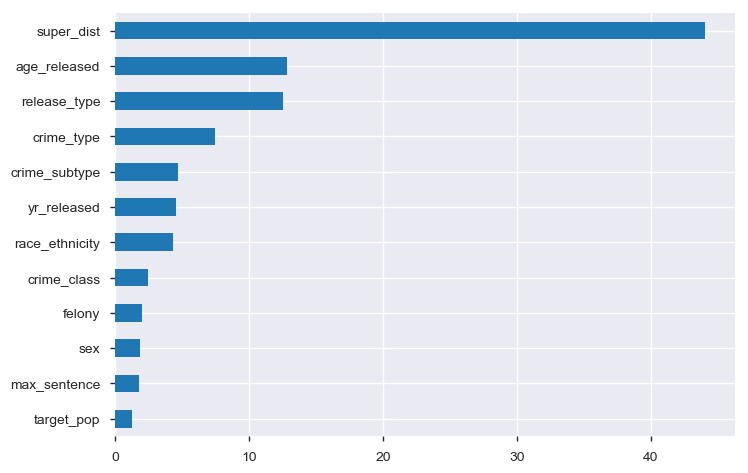

In [39]:
# Plotting Feature Importances
important_feature_names = cb_base.feature_names_
important_feature_scores = cb_base.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)
important_features.sort_values().plot(kind='barh')

#### Defining Roc_Auc Curve

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

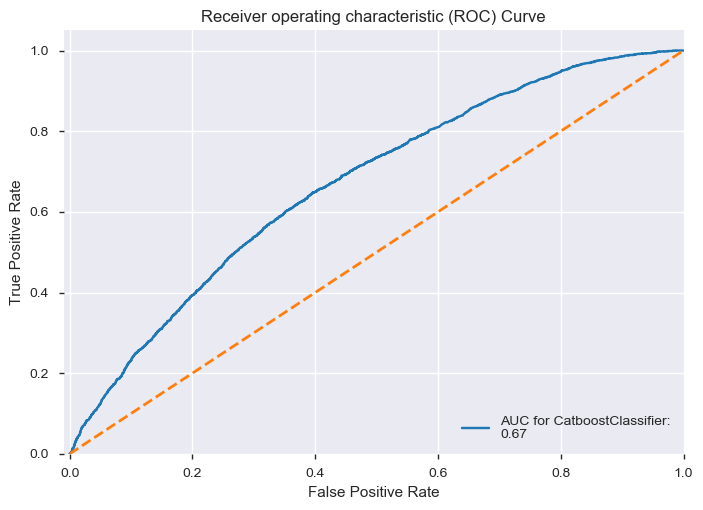

In [41]:
# Define plot_auc_roc_curve
def plot_auc_roc_curve(y_test, y_test_pred):
    """ Takes y_test and y_test_pred from a ML model and plots the AUC-ROC curve."""
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, thresh  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot roc_auc_curve
y_test_pred = cb_base.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

Normalized confusion matrix
[[0.9807995  0.0192005 ]
 [0.93811956 0.06188044]]


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\bs_ds\bs_ds.py:1410: UserWarning: Future versions will be moving plot_confusion_matrix to bs_ds.glassboxes module.
  warnings.warn('Future versions will be moving plot_confusion_matrix to bs_ds.glassboxes module.')


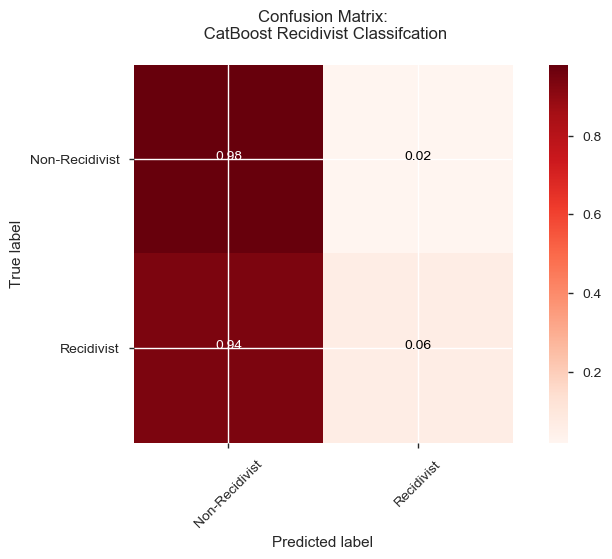

In [42]:
import itertools
from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_base.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Non-Recidivist', 'Recidivist'], normalize=True, cmap='Reds',
                      title='Confusion Matrix:\n CatBoost Recidivist Classifcation\n')

### Notes Following Initial Modeling:
- The ROC-AUC Curve Shows that our model performs better than chance. 
- HOWEVE, There is a major issue with our confusion matrix.
    - There are an extremely high # of False Negatives (prisoners Predicted to be "Non-Recidivist",but were actually "Recidivist")
    - This is a serious flaw with the model and serious hinders real-world applicability. 
- This may be due to the imbalance of cases of recidivists vs non-recidivists in our dataset.

# REVISING THE MODEL
## Balancing Target Classes Using Synthetic Minority Oversampling

In [43]:
# Define X and y 
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [44]:
# df=pd.concat([y,X], axis=1)

In [45]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

### Addressing the Imbalanced Class Issue
- Adding Synthetic Minority Oversampling Technique to balance out the # of recidivists(1) and non-recidivists(0)

In [46]:
from imblearn.over_sampling import SMOTE

print(pd.Series(y).value_counts())

X_resampled, y_resampled = SMOTE().fit_sample(X,y)

print(pd.Series(y_resampled).value_counts())

0    15880
1     8326
Name: recidivist, dtype: int64
1    15880
0    15880
dtype: int64


In [47]:
# Reformatting SMOTE transformed data

# X_resampled back to a dataframe
X_resampled = pd.DataFrame(X_resampled, columns = X.columns)

# X_resampled category columns back to integers
for header in category_cols:
    X_resampled[header] = X_resampled[header].astype('int')
    
# y_resampled back to a named series    
y_resampled = pd.Series(y_resampled)
y_resampled.name ='recidivist'

### Fitting a Revised Model with Balanced Classes

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

In [49]:
from catboost import Pool, CatBoostClassifier
train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [50]:
cb_clf = CatBoostClassifier(iterations=3000, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            allow_const_label=True)#,
#                            logging_level='Info')#,
                           #task_type='GPU')


In [51]:
cb_clf.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=20)
# cb_clf.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7094790	best: 0.7094790 (0)	total: 1.11s	remaining: 55m 41s
1:	test: 0.7092687	best: 0.7094790 (0)	total: 1.25s	remaining: 31m 15s
2:	test: 0.7196398	best: 0.7196398 (2)	total: 2.57s	remaining: 42m 44s
3:	test: 0.7216067	best: 0.7216067 (3)	total: 2.68s	remaining: 33m 26s
4:	test: 0.7200882	best: 0.7216067 (3)	total: 2.77s	remaining: 27m 38s
5:	test: 0.7196564	best: 0.7216067 (3)	total: 2.85s	remaining: 23m 43s
6:	test: 0.7231439	best: 0.7231439 (6)	total: 4.25s	remaining: 30m 18s
7:	test: 0.7230849	best: 0.7231439 (6)	total: 4.3s	remaining: 26m 47s
8:	test: 0.7232436	best: 0.7232436 (8)	total: 4.37s	remaining: 24m 12s
9:	test: 0.7246635	best: 0.7246635 (9)	total: 5.68s	remaining: 28m 19s
10:	test: 0.7269433	best: 0.7269433 (10)	total: 5.89s	remaining: 26m 40s
11:	test: 0.7290095	best: 0.7290095 (11)	total: 6.03s	remaining: 25m 2s
12:	test: 0.7292227	best: 0.7292227 (12)	total: 7.16s	remaining: 27m 24s
13:	test: 0.7295166	best: 0.7295166 (13)	total: 7.25s	remaining: 25m 45s


113:	test: 0.7645164	best: 0.7645164 (113)	total: 43.6s	remaining: 18m 24s
114:	test: 0.7645128	best: 0.7645164 (113)	total: 43.7s	remaining: 18m 15s
115:	test: 0.7646270	best: 0.7646270 (115)	total: 44s	remaining: 18m 13s
116:	test: 0.7646783	best: 0.7646783 (116)	total: 45.5s	remaining: 18m 42s
117:	test: 0.7646493	best: 0.7646783 (116)	total: 45.6s	remaining: 18m 33s
118:	test: 0.7649274	best: 0.7649274 (118)	total: 45.7s	remaining: 18m 25s
119:	test: 0.7649122	best: 0.7649274 (118)	total: 45.7s	remaining: 18m 16s
120:	test: 0.7652015	best: 0.7652015 (120)	total: 45.8s	remaining: 18m 9s
121:	test: 0.7652258	best: 0.7652258 (121)	total: 47.3s	remaining: 18m 36s
122:	test: 0.7653539	best: 0.7653539 (122)	total: 48.9s	remaining: 19m 2s
123:	test: 0.7653384	best: 0.7653539 (122)	total: 50.1s	remaining: 19m 21s
124:	test: 0.7654262	best: 0.7654262 (124)	total: 50.7s	remaining: 19m 26s
125:	test: 0.7654005	best: 0.7654262 (124)	total: 50.8s	remaining: 19m 18s
126:	test: 0.7653999	best: 0.

225:	test: 0.7704485	best: 0.7704485 (225)	total: 1m 19s	remaining: 16m 10s
226:	test: 0.7704871	best: 0.7704871 (226)	total: 1m 19s	remaining: 16m 6s
227:	test: 0.7704735	best: 0.7704871 (226)	total: 1m 19s	remaining: 16m 3s
228:	test: 0.7704751	best: 0.7704871 (226)	total: 1m 19s	remaining: 16m
229:	test: 0.7705046	best: 0.7705046 (229)	total: 1m 19s	remaining: 15m 56s
230:	test: 0.7705506	best: 0.7705506 (230)	total: 1m 19s	remaining: 15m 54s
231:	test: 0.7705506	best: 0.7705506 (230)	total: 1m 19s	remaining: 15m 50s
232:	test: 0.7705486	best: 0.7705506 (230)	total: 1m 19s	remaining: 15m 47s
233:	test: 0.7705444	best: 0.7705506 (230)	total: 1m 19s	remaining: 15m 43s
234:	test: 0.7705702	best: 0.7705702 (234)	total: 1m 19s	remaining: 15m 41s
235:	test: 0.7705899	best: 0.7705899 (235)	total: 1m 20s	remaining: 15m 37s
236:	test: 0.7705998	best: 0.7705998 (236)	total: 1m 20s	remaining: 15m 33s
237:	test: 0.7706182	best: 0.7706182 (237)	total: 1m 20s	remaining: 15m 31s
238:	test: 0.77066

336:	test: 0.7730433	best: 0.7730433 (336)	total: 1m 46s	remaining: 14m 4s
337:	test: 0.7730495	best: 0.7730495 (337)	total: 1m 46s	remaining: 14m 2s
338:	test: 0.7731497	best: 0.7731497 (338)	total: 1m 47s	remaining: 14m
339:	test: 0.7731935	best: 0.7731935 (339)	total: 1m 48s	remaining: 14m 8s
340:	test: 0.7731897	best: 0.7731935 (339)	total: 1m 48s	remaining: 14m 6s
341:	test: 0.7731898	best: 0.7731935 (339)	total: 1m 48s	remaining: 14m 4s
342:	test: 0.7731952	best: 0.7731952 (342)	total: 1m 48s	remaining: 14m 2s
343:	test: 0.7732026	best: 0.7732026 (343)	total: 1m 49s	remaining: 14m 2s
344:	test: 0.7732218	best: 0.7732218 (344)	total: 1m 50s	remaining: 14m 13s
345:	test: 0.7732939	best: 0.7732939 (345)	total: 1m 51s	remaining: 14m 11s
346:	test: 0.7732939	best: 0.7732939 (345)	total: 1m 51s	remaining: 14m 9s
347:	test: 0.7732939	best: 0.7732939 (345)	total: 1m 51s	remaining: 14m 7s
348:	test: 0.7733060	best: 0.7733060 (348)	total: 1m 51s	remaining: 14m 5s
349:	test: 0.7733070	best:

445:	test: 0.7757065	best: 0.7757065 (445)	total: 3m 38s	remaining: 20m 54s
446:	test: 0.7757183	best: 0.7757183 (446)	total: 3m 40s	remaining: 21m
447:	test: 0.7756796	best: 0.7757183 (446)	total: 3m 42s	remaining: 21m 8s
448:	test: 0.7757226	best: 0.7757226 (448)	total: 3m 44s	remaining: 21m 16s
449:	test: 0.7757414	best: 0.7757414 (449)	total: 3m 46s	remaining: 21m 23s
450:	test: 0.7757674	best: 0.7757674 (450)	total: 3m 48s	remaining: 21m 29s
451:	test: 0.7758105	best: 0.7758105 (451)	total: 3m 49s	remaining: 21m 35s
452:	test: 0.7758108	best: 0.7758108 (452)	total: 3m 51s	remaining: 21m 41s
453:	test: 0.7758122	best: 0.7758122 (453)	total: 3m 53s	remaining: 21m 48s
454:	test: 0.7759015	best: 0.7759015 (454)	total: 3m 55s	remaining: 21m 56s
455:	test: 0.7760174	best: 0.7760174 (455)	total: 3m 57s	remaining: 22m 4s
456:	test: 0.7760304	best: 0.7760304 (456)	total: 3m 59s	remaining: 22m 10s
457:	test: 0.7760402	best: 0.7760402 (457)	total: 4m 1s	remaining: 22m 18s
458:	test: 0.776031

554:	test: 0.7782138	best: 0.7782641 (546)	total: 6m 55s	remaining: 30m 29s
555:	test: 0.7782211	best: 0.7782641 (546)	total: 6m 57s	remaining: 30m 33s
556:	test: 0.7782087	best: 0.7782641 (546)	total: 6m 58s	remaining: 30m 36s
557:	test: 0.7782177	best: 0.7782641 (546)	total: 7m	remaining: 30m 41s
558:	test: 0.7782328	best: 0.7782641 (546)	total: 7m 3s	remaining: 30m 47s
559:	test: 0.7783116	best: 0.7783116 (559)	total: 7m 4s	remaining: 30m 51s
560:	test: 0.7783272	best: 0.7783272 (560)	total: 7m 6s	remaining: 30m 54s
561:	test: 0.7783349	best: 0.7783349 (561)	total: 7m 8s	remaining: 30m 57s
562:	test: 0.7783349	best: 0.7783349 (561)	total: 7m 8s	remaining: 30m 54s
563:	test: 0.7783514	best: 0.7783514 (563)	total: 7m 10s	remaining: 30m 57s
564:	test: 0.7783541	best: 0.7783541 (564)	total: 7m 11s	remaining: 31m
565:	test: 0.7783687	best: 0.7783687 (565)	total: 7m 14s	remaining: 31m 7s
566:	test: 0.7783935	best: 0.7783935 (566)	total: 7m 16s	remaining: 31m 11s
567:	test: 0.7784601	best:

663:	test: 0.7792880	best: 0.7792880 (663)	total: 9m 54s	remaining: 34m 53s
664:	test: 0.7792834	best: 0.7792880 (663)	total: 9m 56s	remaining: 34m 55s
665:	test: 0.7792571	best: 0.7792880 (663)	total: 9m 58s	remaining: 34m 57s
666:	test: 0.7792643	best: 0.7792880 (663)	total: 10m	remaining: 34m 59s
667:	test: 0.7792643	best: 0.7792880 (663)	total: 10m 1s	remaining: 35m 1s
668:	test: 0.7792632	best: 0.7792880 (663)	total: 10m 4s	remaining: 35m 6s
669:	test: 0.7792700	best: 0.7792880 (663)	total: 10m 6s	remaining: 35m 8s
670:	test: 0.7792707	best: 0.7792880 (663)	total: 10m 7s	remaining: 35m 10s
671:	test: 0.7792706	best: 0.7792880 (663)	total: 10m 9s	remaining: 35m 11s
672:	test: 0.7792743	best: 0.7792880 (663)	total: 10m 11s	remaining: 35m 13s
673:	test: 0.7792747	best: 0.7792880 (663)	total: 10m 13s	remaining: 35m 18s
674:	test: 0.7792803	best: 0.7792880 (663)	total: 10m 15s	remaining: 35m 20s
675:	test: 0.7792869	best: 0.7792880 (663)	total: 10m 17s	remaining: 35m 22s
676:	test: 0.7

771:	test: 0.7796804	best: 0.7796804 (771)	total: 13m 17s	remaining: 38m 22s
772:	test: 0.7796804	best: 0.7796804 (772)	total: 13m 20s	remaining: 38m 27s
773:	test: 0.7796811	best: 0.7796811 (773)	total: 13m 25s	remaining: 38m 35s
774:	test: 0.7796811	best: 0.7796811 (773)	total: 13m 25s	remaining: 38m 33s
775:	test: 0.7796812	best: 0.7796812 (775)	total: 13m 25s	remaining: 38m 29s
776:	test: 0.7796812	best: 0.7796812 (775)	total: 13m 29s	remaining: 38m 34s
777:	test: 0.7796812	best: 0.7796812 (775)	total: 13m 31s	remaining: 38m 38s
778:	test: 0.7796809	best: 0.7796812 (775)	total: 13m 34s	remaining: 38m 41s
779:	test: 0.7796803	best: 0.7796812 (775)	total: 13m 35s	remaining: 38m 41s
780:	test: 0.7796689	best: 0.7796812 (775)	total: 13m 37s	remaining: 38m 42s
781:	test: 0.7796662	best: 0.7796812 (775)	total: 13m 39s	remaining: 38m 43s
782:	test: 0.7796662	best: 0.7796812 (775)	total: 13m 40s	remaining: 38m 44s
783:	test: 0.7796743	best: 0.7796812 (775)	total: 13m 43s	remaining: 38m 48s

878:	test: 0.7799401	best: 0.7799437 (862)	total: 17m 1s	remaining: 41m 6s
879:	test: 0.7799401	best: 0.7799437 (862)	total: 17m 2s	remaining: 41m 2s
880:	test: 0.7799395	best: 0.7799437 (862)	total: 17m 2s	remaining: 41m
881:	test: 0.7799443	best: 0.7799443 (881)	total: 17m 4s	remaining: 41m
882:	test: 0.7799409	best: 0.7799443 (881)	total: 17m 6s	remaining: 41m 1s
883:	test: 0.7799409	best: 0.7799443 (881)	total: 17m 6s	remaining: 40m 58s
884:	test: 0.7799409	best: 0.7799443 (881)	total: 17m 8s	remaining: 40m 58s
885:	test: 0.7799422	best: 0.7799443 (881)	total: 17m 10s	remaining: 40m 59s
886:	test: 0.7799351	best: 0.7799443 (881)	total: 17m 12s	remaining: 41m
887:	test: 0.7799351	best: 0.7799443 (881)	total: 17m 14s	remaining: 41m
888:	test: 0.7799350	best: 0.7799443 (881)	total: 17m 16s	remaining: 41m 1s
889:	test: 0.7799374	best: 0.7799443 (881)	total: 17m 18s	remaining: 41m 2s
890:	test: 0.7799374	best: 0.7799443 (881)	total: 17m 20s	remaining: 41m 2s
891:	test: 0.7799382	best: 0

986:	test: 0.7802164	best: 0.7802313 (983)	total: 20m 25s	remaining: 41m 38s
987:	test: 0.7802232	best: 0.7802313 (983)	total: 20m 27s	remaining: 41m 38s
988:	test: 0.7802232	best: 0.7802313 (983)	total: 20m 28s	remaining: 41m 38s
989:	test: 0.7802174	best: 0.7802313 (983)	total: 20m 30s	remaining: 41m 38s
990:	test: 0.7802184	best: 0.7802313 (983)	total: 20m 33s	remaining: 41m 39s
991:	test: 0.7802176	best: 0.7802313 (983)	total: 20m 34s	remaining: 41m 39s
992:	test: 0.7802189	best: 0.7802313 (983)	total: 20m 37s	remaining: 41m 40s
993:	test: 0.7802414	best: 0.7802414 (993)	total: 20m 39s	remaining: 41m 40s
994:	test: 0.7802692	best: 0.7802692 (994)	total: 20m 41s	remaining: 41m 41s
995:	test: 0.7802702	best: 0.7802702 (995)	total: 20m 44s	remaining: 41m 43s
996:	test: 0.7802710	best: 0.7802710 (996)	total: 20m 46s	remaining: 41m 43s
997:	test: 0.7802848	best: 0.7802848 (997)	total: 20m 48s	remaining: 41m 44s
998:	test: 0.7802944	best: 0.7802944 (998)	total: 20m 50s	remaining: 41m 44s

_____________________________________________

### Statistical Summary

In [52]:
from catboost.utils import get_roc_curve
from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, balanced_accuracy_score, classification_report, roc_auc_score, precision_score

In [53]:
# cb_clf.save_model('catboost_model_78auc.cbm',format='cbm',pool=train_pool)


In [54]:
y_preds = cb_clf.predict(X_test)
y_prob_preds = cb_clf.predict_proba(X_test)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      6331
           1       0.71      0.65      0.68      6373

   micro avg       0.69      0.69      0.69     12704
   macro avg       0.69      0.69      0.69     12704
weighted avg       0.69      0.69      0.69     12704



In [56]:
# fpr, tpr, thresholds = roc_curve(y_test, y_preds)
# print(roc_auc_score(y_test,y_preds))

In [57]:
# Print catboost accuracy report
print(f'Accuracy:{accuracy_score(y_test, y_preds):.2f}')
print(f'Recall:{recall_score(y_test, y_preds):.2f}')
print(f'Precision:{precision_score(y_test, y_preds):.2f}')
# Get roc-auc curve from catboost
fpr, tpr, thresholds = get_roc_curve(cb_clf, test_pool, thread_count=-1)
print(f'AUC:{auc(fpr,tpr):.2f}')

Accuracy:0.69
Recall:0.65
Precision:0.71
AUC:0.78


## Visual Summary

In [58]:
# Plotting Feature Importances
important_feature_names = cb_clf.feature_names_
important_feature_scores = cb_clf.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)

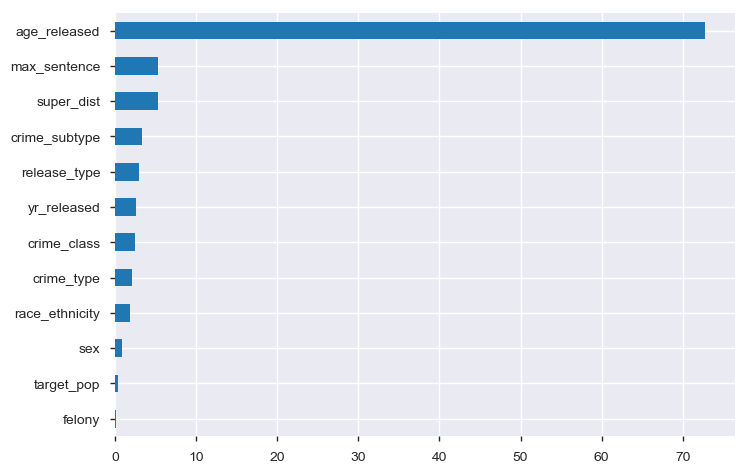

In [59]:
important_features.sort_values().plot(kind='barh')

### AUC-ROC Curve

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# from bs_ds.bs_ds import plot_a

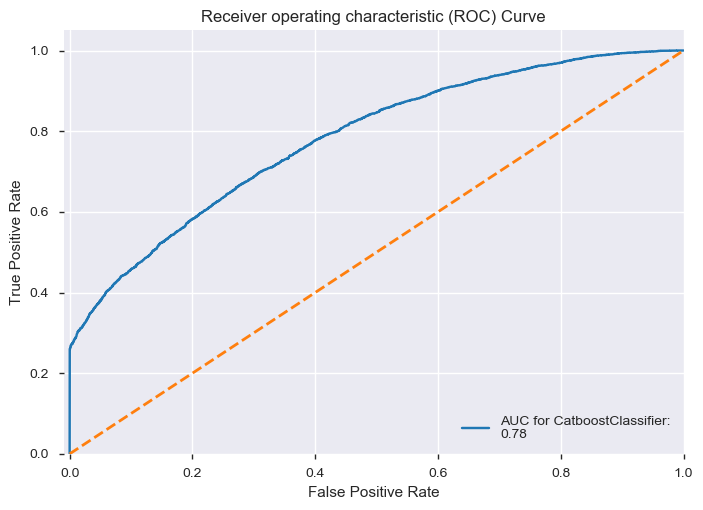

In [61]:
y_test_pred = cb_clf.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

### Confusion Matrix


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\bs_ds\bs_ds.py:1410: UserWarning: Future versions will be moving plot_confusion_matrix to bs_ds.glassboxes module.
  warnings.warn('Future versions will be moving plot_confusion_matrix to bs_ds.glassboxes module.')


Normalized confusion matrix
[[0.73874585 0.26125415]
 [0.35242429 0.64757571]]


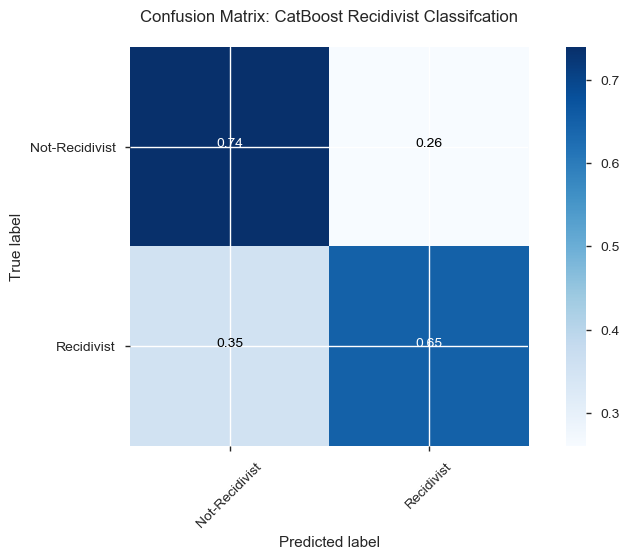

In [62]:
# import itertools
# from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Not-Recidivist', 'Recidivist'], normalize=True, cmap='Blues',
                      title='Confusion Matrix: CatBoost Recidivist Classifcation\n')

# CONCLUSIONS
- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.

### POST-REVIEW SUGGESTIONS / IDEAS:
- [ ] Try using reduction instead of SMOTE.
- [ ] seaborn catplot bar graphs
- [ ] Add tree or other visuals
    - Try Mike's SHAP plots

In [63]:
from bs_ds import viz_tree

In [64]:
viz_tree(cb_clf)

NotFittedError: This CatBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
compare_tree = sklearn.tree.DecisionTreeClassifier()
dir(compare_tree)

In [ ]:
compare_tree.fit(X_train, y_train)

In [ ]:
dir(compare_tree)

In [ ]:
# This is the tree object that sklearn generates and is looking for 
help(compare_tree.tree_)

In [ ]:
dir(cb_clf)

In [ ]:
help(cb_clf.get_metadata())

In [ ]:
test = cb_clf.get_metadata()

In [ ]:
help(cb_clf)

### SHAP values
https://github.com/jirvingphd/shap


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(cb_clf)

In [ ]:
shap_vals = explainer.shap_values(train_pool)

In [ ]:
shap.force_plot(explainer.expected_value, shap_vals[:1000],X_train[:1000])

In [ ]:
shap.summary_plot(shap_vals, X_train)

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")